In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Loading the dataset
movie = pd.read_csv('imdb_dataset.csv',on_bad_lines="skip")


In [ ]:
movie.shape

(50000, 2)

In [ ]:
movie.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
movie.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
movie.dtypes

,0
review,object
sentiment,object


In [ ]:
movie.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
movie.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
movie.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
movie.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


Data Preprocessing

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))


In [ ]:
def text_preprocessing(text):
  text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
  text = re.sub(r'\W', ' ', text)  # Remove non-word characters
  text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
  text = text.lower()  # Convert to lowercase
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return ' '.join(tokens)


In [ ]:
movie['review_processed'] = movie['review'].apply(text_preprocessing)

In [ ]:
movie.columns

Index(['review', 'sentiment', 'review_processed'], dtype='object')

Exploratory Data Analysis

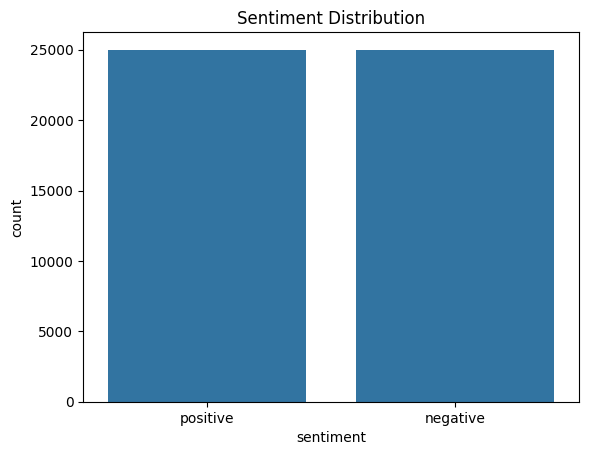

In [ ]:
sns.countplot(x='sentiment', data=movie)
plt.title('Sentiment Distribution')
plt.show()

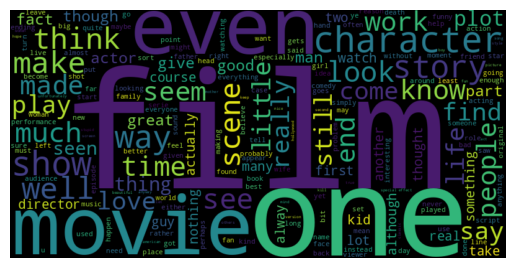

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join(movie['review_processed'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Feature Extraction


In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(movie['review_processed'])
y = movie['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

Splitting the Dataset

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
model.score(x_test,y_test)

0.8545

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
model2.score(x_test,y_test)

0.8534

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model3.score(x_test,y_test)

0.8947